In [2]:
import graphlab
import numpy as np
import matplotlib.pyplot as plt

[INFO] 1450674082 : INFO:     (initialize_globals_from_environment:282): Setting configuration variable GRAPHLAB_FILEIO_ALTERNATIVE_SSL_CERT_FILE to /Users/cottalucas/anaconda2/lib/python2.7/site-packages/certifi/cacert.pem
1450674082 : INFO:     (initialize_globals_from_environment:282): Setting configuration variable GRAPHLAB_FILEIO_ALTERNATIVE_SSL_CERT_DIR to 
This non-commercial license of GraphLab Create is assigned to lucas.oliveira.cotta@gmail.com and will expire on September 25, 2016. For commercial licensing options, visit https://dato.com/buy/.

[INFO] Start server at: ipc:///tmp/graphlab_server-885 - Server binary: /Users/cottalucas/anaconda2/lib/python2.7/site-packages/graphlab/unity_server - Server log: /tmp/graphlab_server_1450674082.log
[INFO] GraphLab Server Version: 1.7.1


# Manipulating Data

In [53]:
#
# file path
path = 'output_last_4months.csv'


#
# reading method defining the type of each colunm
sales = graphlab.SFrame.read_csv(path)

sales

PROGRESS: Finished parsing file /Users/cottalucas/Documents/ML/Braloba Regression/output_last_4months.csv
PROGRESS: Parsing completed. Parsed 100 lines in 0.028691 secs.
------------------------------------------------------
Inferred types from first line of file as 
column_type_hints=[int,int,int,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------
PROGRESS: Finished parsing file /Users/cottalucas/Documents/ML/Braloba Regression/output_last_4months.csv
PROGRESS: Parsing completed. Parsed 139 lines in 0.011065 secs.


Difficult,Average,Nan Hai,Grand Total
422,182,106,710
100,324,360,784
810,0,401,1211
824,0,576,1400
0,0,1531,1531
35,46,854,935
459,754,12,1225
0,1273,0,1273
237,1162,194,1593
81,852,457,1390


In [54]:
#
# divinding the data into training and testing
train_data, test_data = sales.random_split(.8,seed=0)

# Building the Regression Model

In [159]:
#
# chosing the features

features = ['Difficult', 'Average', 'Nan Hai']
features_2 = ['Nan Hai']
features_3 = ['Average']
features_4 = ['Difficult']

model_1 = graphlab.linear_regression.create(train_data, target='Grand Total', features=features)
model_2 = graphlab.linear_regression.create(train_data, target='Grand Total', features=features_2)
model_3 = graphlab.linear_regression.create(train_data, target='Grand Total', features=features_3)
model_4 = graphlab.linear_regression.create(train_data, target='Grand Total', features=features_4)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: Linear regression:
PROGRESS: --------------------------------------------------------
PROGRESS: Number of examples          : 116
PROGRESS: Number of features          : 3
PROGRESS: Number of unpacked features : 3
PROGRESS: Number of coefficients    : 4
PROGRESS: Starting Newton Method
PROGRESS: --------------------------------------------------------
PROGRESS: +-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+
PROGRESS: | Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |
PROGRESS: +-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+
PROGRESS: | 1         | 2        | 0.000555     | 0.926239           | 0.237658  

# Data knowledge, exploration and visualization

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline

## All Features

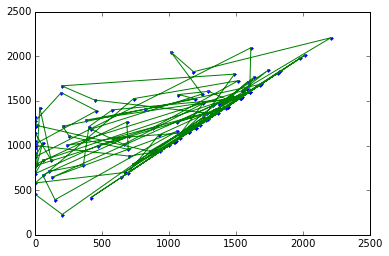

In [163]:
#
# Visualization to Model 1

plt.plot(train_data['Nan Hai'], train_data['Grand Total'],'.',
         train_data['Nan Hai'], model_1.predict(train_data),'-')

## Nan Hai

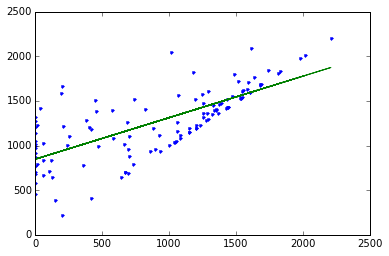

In [160]:
#
# Visualization to Model 2

plt.plot(train_data['Nan Hai'], train_data['Grand Total'],'.',
         train_data['Nan Hai'], model_2.predict(train_data),'-')

## Average

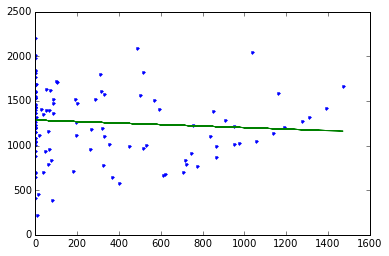

In [166]:
#
# Visualization to Model 3

plt.plot(train_data['Average'], train_data['Grand Total'],'.',
         train_data['Average'], model_3.predict(train_data),'-')

## Difficult

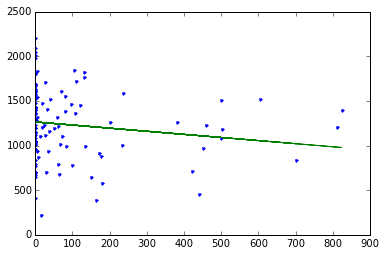

In [168]:
#
# Visualization to Model 4

plt.plot(train_data['Difficult'], train_data['Grand Total'],'.',
         train_data['Difficult'], model_4.predict(train_data),'-')

## Values - All

In [157]:
# Showing the Model 1
graphlab.canvas.set_target('ipynb')
model_1.show()

## Values - Nan Hai

In [158]:
# Showing the Model 2
graphlab.canvas.set_target('ipynb')
model_2.show()

## Values - Average

In [161]:
# Showing the Model 3
graphlab.canvas.set_target('ipynb')
model_3.show()

## Values - Difficult

In [162]:
# Showing the Model 4
graphlab.canvas.set_target('ipynb')
model_4.show()

## Features Summary

In [57]:
sales[features].show()

## Nan Hai

In [170]:
graphlab.canvas.set_target('ipynb')

sales.show(view='Scatter Plot', x='Nan Hai', y='Grand Total')

## Average

In [173]:
graphlab.canvas.set_target('ipynb')

sales.show(view='Scatter Plot', x='Average', y='Grand Total')

## Difficult

In [172]:
graphlab.canvas.set_target('ipynb')

sales.show(view='Scatter Plot', x='Difficult', y='Grand Total')

# Extracting the Regression Weights

In [59]:
weights = model_1.get("coefficients")

print (weights)

+-------------+-------+----------------+
|     name    | index |     value      |
+-------------+-------+----------------+
| (intercept) |  None | 1.11391564728  |
|  Difficult  |  None | 0.998818010524 |
|   Average   |  None | 0.998988794087 |
|   Nan Hai   |  None | 0.999174234071 |
+-------------+-------+----------------+
[4 rows x 3 columns]



# Making Predictions

In [60]:
predictions = model_1.predict(train_data)
actual = predictions[0]

tolerance = 0.0000001
print predictions

# Evaluating

model_1.evaluate(train_data)

[710.3435454237656, 784.3708102494915, 1210.8253720342877, 1399.6643151440999, 1530.849668010429, 935.3208264404985, 1224.799024028149, 1272.826650519881, 1592.4985642802503, 1389.7792520323264, 1016.0750879408369, 918.1562538462169, 1314.7831551701527, 1056.046082203027, 1136.9641745240647, 835.2918115079549, 1424.6792521805573, 795.3016289888415, 1262.898364207318, 957.2750723775905, 1102.0448045242933, 1214.9130686458711, 1522.7888039204404, 1570.7237319410913, 1606.7288670847272, 1516.8452808947716, 1283.8858090089282, 1406.8426533947866, 1684.721387417502, 1533.847190712643, 1050.2468614221364, 644.5821223891908, 1043.2526417836373, 1081.2212626783464, 416.7703970209356, 1034.2600736769957, 1001.287323952643, 1227.0925077111672, 1834.596854050366, 1676.729106184838, 1436.9272900077274, 960.3089413167488, 227.91909824484415, 453.5808653845195, 967.0588853588603, 1206.8903160060142, 1000.0796539531691, 881.3230080726652, 938.3372098648675, 791.449422958622, 1407.9350019701294, 1118.

{'max_error': 0.9190982448441503, 'rmse': 0.31833603772937424}

# Compute RSS

In [61]:
#
# RSS function given the model, data, and the outcome; type = dictionary 
summary = model_1.summary(output='dict')

#
# Location of the RSS in the summary
rss = summary['sections'][3][0][1]
print(rss)

12.2172


# Predicting New Values

In [240]:
#
# Creating the desired final values

Goal = 1700

new_data = graphlab.SFrame({'Grand Total': [None],
                            'Nan Hai': [Goal*.47],
                            'Difficult': [Goal*-.084],
                            'Average': [Goal*-.348]})

In [232]:
new_prediction = model_1.predict(new_data)

In [233]:
print new_prediction

[80.40698793416072]


In [241]:
new_data_2 = graphlab.SFrame({'Grand Total': [None],
                            'Nan Hai': [Goal*.80],
                            'Difficult': [Goal*.05],
                            'Average': [Goal*.10]})

In [242]:
new_prediction_2 = model_1.predict(new_data_2)

In [243]:
print new_prediction_2

[1614.7191018728215]
